In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import random 
import csv 
from collections import defaultdict
from sklearn.model_selection import train_test_split
from collections import Counter, defaultdict
sns.set(style="whitegrid")

# Class definition

In [3]:
class NaiveBayesDefinition():
    # the categorical class names are changed to numberic data 
    # eg: yes and no encoded to 1 and 0 
    def encode_class(self, mydata): 
        classes = [] 
        for i in range(len(mydata)): 
            if mydata[i][-1] not in classes: 
                classes.append(mydata[i][-1]) 
        for i in range(len(classes)): 
            for j in range(len(mydata)): 
                if mydata[j][-1] == classes[i]: 
                    mydata[j][-1] = i 
        return mydata             


    # Splitting the data 
    def splitting(self, mydata, ratio): 
        train_num = int(len(mydata) * ratio) 
        train = [] 
        # initally testset will have all the dataset  
        test = list(mydata) 
        while len(train) < train_num: 
            # index generated randomly from range 0  
            # to length of testset 
            index = random.randrange(len(test)) 
            # from testset, pop data rows and put it in train 
            train.append(test.pop(index)) 
        return train, test 


    # Group the data rows under each class yes or  
    # no in dictionary eg: dict[yes] and dict[no]  
    def groupUnderClass(self, mydata): 
        dict = {} 
        for i in range(len(mydata)): 
            if (mydata[i][-1] not in dict): 
                dict[mydata[i][-1]] = [] 
            dict[mydata[i][-1]].append(mydata[i]) 
        return dict


    # Calculating Mean 
    def mean(self, numbers): 
        return sum(numbers) / float(len(numbers)) 

    # Calculating Standard Deviation 
    def std_dev(self, numbers): 
        avg = self.mean(numbers) 
        variance = sum([pow(x - avg, 2) for x in numbers]) / float(len(numbers) - 1) 
        return math.sqrt(variance) 

    def trainClass(self, mydata): 
        info = [(self.mean(attribute), self.std_dev(attribute)) for attribute in zip(*mydata)] 
        # eg: list = [ [a, b, c], [m, n, o], [x, y, z]] 
        # here mean of 1st attribute =(a + m+x), mean of 2nd attribute = (b + n+y)/3 
        # delete summaries of last class 
        del info[-1] 
        return info 

    # find Mean and Standard Deviation under each class 
    def train(self, mydata): 
        info = {} 
        dict = self.groupUnderClass(mydata) 
        for classValue, instances in dict.items(): 
            info[classValue] = self.trainClass(instances) 
        return info 


    # Calculate Gaussian Probability Density Function 
    def calculateGaussianProbability(self, x, mean, stdev): 
        expo = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev, 2)))) 
        return (1 / (math.sqrt(2 * math.pi) * stdev)) * expo 


    # Calculate Class Probabilities 
    def calculateClassProbabilities(self, info, test): 
        probabilities = {} 
        for classValue, classSummaries in info.items(): 
            probabilities[classValue] = 1
            for i in range(len(classSummaries)): 
                mean, std_dev = classSummaries[i] 
                x = test[i] 
                probabilities[classValue] *= self.calculateGaussianProbability(x, mean, std_dev) 
        return probabilities 


    # Make prediction - highest probability is the prediction 
    def predict(self, info, test): 
        probabilities = self.calculateClassProbabilities(info, test) 
        bestLabel, bestProb = None, -1
        for classValue, probability in probabilities.items(): 
            if bestLabel is None or probability > bestProb: 
                bestProb = probability 
                bestLabel = classValue 
        return bestLabel 


    # returns predictions for a set of examples 
    def getPredictions(self, info, test): 
        predictions = [] 
        for i in range(len(test)): 
            result = self.predict(info, test[i]) 
            predictions.append(result) 
        return predictions 

    # Accuracy score 
    def accuracy_rate(self, test, predictions): 
        correct = 0
        for i in range(len(test)): 
            if test[i][-1] == predictions[i]: 
                correct += 1
        return (correct / float(len(test))) * 100.0
    
    def visualize(self, y_true, y_pred, target):
        
        tr = pd.DataFrame(data=y_true, columns=[target])
        pr = pd.DataFrame(data=y_pred, columns=[target])
        
        
        fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,6))
        
        sns.countplot(x=target, data=tr, ax=ax[0], palette='viridis', alpha=0.7, hue=target, dodge=False)
        sns.countplot(x=target, data=pr, ax=ax[1], palette='viridis', alpha=0.7, hue=target, dodge=False)
        

        fig.suptitle('True vs Predicted Comparison', fontsize=20)

        ax[0].tick_params(labelsize=12)
        ax[1].tick_params(labelsize=12)
        ax[0].set_title("True values", fontsize=18)
        ax[1].set_title("Predicted values", fontsize=18)
        plt.show()

# DATASET 1

## Read and clean dataset

In [4]:
df = pd.read_csv("Set1.txt", delimiter = "\t", names=["P1", "P2", "P3", "P4", "P5", "P6", "P7", "Floor"])

In [5]:
df

,P1,P2,P3,P4,P5,P6,P7,Floor
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1
...,...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94,4
1996,-59,-56,-50,-62,-47,-87,-90,4
1997,-62,-59,-46,-65,-45,-87,-88,4
1998,-62,-58,-52,-61,-41,-90,-85,4


## Perform analysis

### Prepare data

In [6]:
model = NaiveBayesDefinition()

In [7]:
# set features and target
mydata = df.values.tolist() 
mydata = model.encode_class(mydata) 
for i in range(len(mydata)): 
    mydata[i] = [float(x) for x in mydata[i]] 

In [8]:
# split ratio = 0.7  
# 70% of data is training data and 30% is test data used for testing 
ratio = 0.7
train_data, test_data = model.splitting(mydata, ratio) 
print('Total number of examples are: ', len(mydata)) 
print('Out of these, training examples are: ', len(train_data)) 
print("Test examples are: ", len(test_data)) 

Total number of examples are:  2000
Out of these, training examples are:  1400
Test examples are:  600


In [9]:
# prepare model 
info = model.train(train_data) 

In [10]:
# test model 
predictions = model.getPredictions(info, test_data) 
accuracy = model.accuracy_rate(test_data, predictions) 
print("Accuracy of your model is: ", accuracy) 

Accuracy of your model is:  98.16666666666667


In [11]:
predictions

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [12]:
labels = [item[-1] for item in test_data]

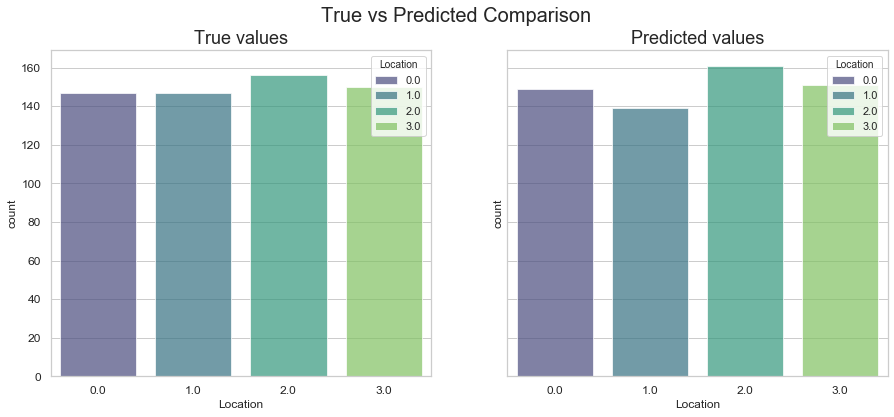

In [13]:
# Visualize predictions
model.visualize(labels, predictions, 'Location')

# DATASET 2

## Read an clean dataset 

In [14]:
# read
#xl = pd.ExcelFile("Set2.xlsx")
#xl.sheet_names
#df = xl.parse("f3b1u17p22")
df = pd.read_excel("Set2.xlsx")

In [15]:
df

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-75412642999999200,4.864921e+16,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536621199999000,4.864934e+15,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519152399998150,4.864950e+15,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-75245703999996096,4.864934e+15,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632143599998200,4.864982e+15,0,0,122,2,11,13,1369909710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,100,100,100,100,100,100,100,100,100,100,...,100,-7485468600001180,4.864875e+15,3,1,1,2,18,10,1371710683
19933,100,100,100,100,100,100,100,100,100,100,...,100,-7390620600000020,4.864836e+15,1,2,140,2,18,10,1371710402
19934,100,100,100,100,100,100,100,100,100,100,...,100,-75168414999991600,4.864889e+15,3,1,13,2,18,10,1371710921
19935,100,100,100,100,100,100,100,100,100,100,...,100,-7537321899998930,4.864896e+15,3,1,113,2,18,10,1371711049


# Perform analysis

The analisis performed, conssits in a classification with naive bayes, that ....

### Prepare data

In [16]:
model2 = NaiveBayesDefinition()

In [17]:
# set features and target
mydata = df.values.tolist() 
mydata = model2.encode_class(mydata) 
for i in range(len(mydata)): 
    mydata[i] = [float(x) for x in mydata[i]] 

In [18]:
# split ratio = 0.7  
# 70% of data is training data and 30% is test data used for testing 
ratio = 0.7
train_data, test_data = model2.splitting(mydata, ratio) 
print('Total number of examples are: ', len(mydata)) 
print('Out of these, training examples are: ', len(train_data)) 
print("Test examples are: ", len(test_data)) 

Total number of examples are:  19937
Out of these, training examples are:  13955
Test examples are:  5982


In [19]:
# prepare model 
info = model2.train(train_data) 

ZeroDivisionError: float division by zero

In [ ]:
# test model 
predictions = model2.getPredictions(info, test_data) 
accuracy = model2.accuracy_rate(test_data, predictions) 
print("Accuracy of your model is: ", accuracy) 

In [ ]:
predictions

In [ ]:
labels = [item[-1] for item in test_data]

In [ ]:
# Visualize predictions
model2.visualize(test_data, predictions, 'Location')